In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

### Question 1
> 1. Plot the complementary cumulative distribution function (CCDF).

In [2]:
zipped_file = 'vocab_cs_mod.txt.gz'
column_names = ['k', 'N']
k_N_df = pd.read_csv(zipped_file,
                     compression='gzip',
                     sep=' ',
                     names=column_names)
k_N_df.head()

,k,N
0,30578667846,1
1,22077031422,1
2,21594821357,1
3,19401194714,1
4,16337125274,1


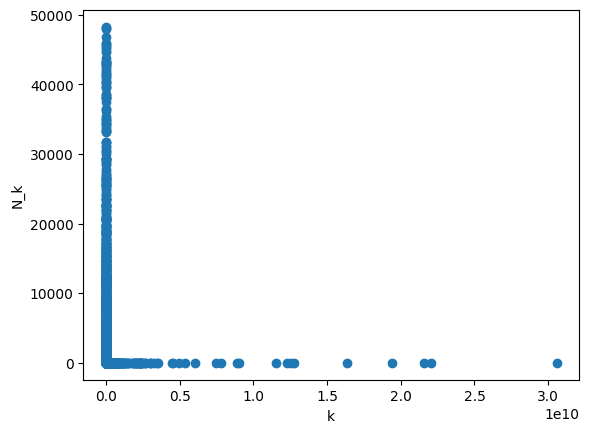

In [3]:
plt.xlabel('k')
plt.ylabel('N_k')
plt.scatter(k_N_df['k'], k_N_df['N'])

In [4]:
# Create cumulative N count
# Needs to be ordered properly first
k_N_df = k_N_df.sort_values(by='k', ascending=False)
k_N_df['cumul_N'] = k_N_df['N'].cumsum()

k_N_df['log10_k'] = np.log10(k_N_df['k'])
k_N_df['log10_Ngreaterk'] = np.log10(k_N_df['cumul_N'])
k_N_df.head()

,k,N,cumul_N,log10_k,log10_Ngreaterk
0,30578667846,1,1,10.485419,0.000000
1,22077031422,1,2,10.343941,0.301030
2,21594821357,1,3,10.334350,0.477121
3,19401194714,1,4,10.287828,0.602060
4,16337125274,1,5,10.213176,0.698970


In [5]:
k_N_df

,k,N,cumul_N,log10_k,log10_Ngreaterk
0,30578667846,1,1,10.485419,0.000000
1,22077031422,1,2,10.343941,0.301030
2,21594821357,1,3,10.334350,0.477121
3,19401194714,1,4,10.287828,0.602060
4,16337125274,1,5,10.213176,0.698970
...,...,...,...,...,...
238586,204,46023,13346834,2.309630,7.125378
238587,203,48262,13395096,2.307496,7.126946
238588,202,46787,13441883,2.305351,7.128460
238589,201,48179,13490062,2.303196,7.130014


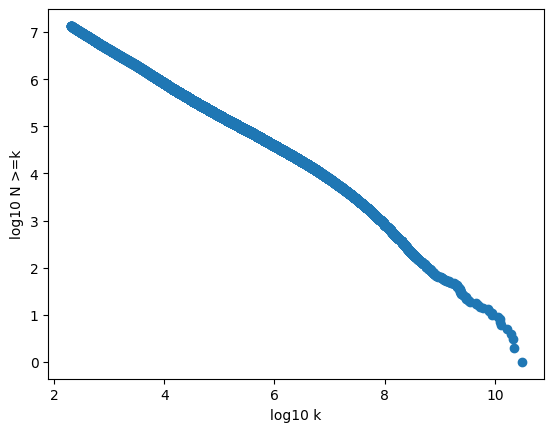

In [6]:
plt.xlabel('log10 k')
plt.ylabel('log10 N >=k')
plt.scatter(k_N_df['log10_k'], k_N_df['log10_Ngreaterk'])

### Question 2
> 2. Using standard linear regression, measure the exponent γ − 1 where γ is the
exponent of the underlying distribution function. Identify and use a range of
frequencies for which scaling appears consistent. Report the 95% confidence
interval for your estimate.
You will find two scaling regimes—please examine them both

In [7]:
# From the last diagram above, it looks like a flat line between log10(k) > 2 and log10(k) = 7
range_1 = {"min": 2, "max": 6.5}

# I don't see another really straight line, but maybe around 8 < log10(k) < 10
range_2 = {"min": 7.5, "max": 9}

In [8]:
scaling_range_1 = k_N_df[(k_N_df['log10_k'] < range_1["max"]) & (k_N_df['log10_k'] >= range_1["min"])]
scaling_range_1

,k,N,cumul_N,log10_k,log10_Ngreaterk
17873,3162229,1,17880,6.499993,4.252368
17874,3162203,1,17881,6.499990,4.252392
17875,3161943,1,17882,6.499954,4.252416
17876,3161886,1,17883,6.499946,4.252440
17877,3161833,1,17884,6.499939,4.252465
...,...,...,...,...,...
238586,204,46023,13346834,2.309630,7.125378
238587,203,48262,13395096,2.307496,7.126946
238588,202,46787,13441883,2.305351,7.128460
238589,201,48179,13490062,2.303196,7.130014


In [9]:
X = sm.add_constant(scaling_range_1['log10_k'])
line_1 = sm.OLS(scaling_range_1['log10_Ngreaterk'], X).fit()
print(line_1.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.999        
Dependent Variable: log10_Ngreaterk  AIC:                -1265641.3432
Date:               2023-10-01 16:37 BIC:                -1265620.7339
No. Observations:   220718           Log-Likelihood:     6.3282e+05   
Df Model:           1                F-statistic:        2.084e+08    
Df Residuals:       220716           Prob (F-statistic): 0.00         
R-squared:          0.999            Scale:              0.00018932   
------------------------------------------------------------------------
            Coef.    Std.Err.        t        P>|t|     [0.025    0.975]
------------------------------------------------------------------------
const       8.5329     0.0002    36129.7527   0.0000    8.5325    8.5334
log10_k    -0.6592     0.0000   -14436.1627   0.0000   -0.6593   -0.6591
----------------------------------------------------------------------
Omnibus:        

In [10]:
slope_1 = line_1.params.log10_k
intercept_1 = line_1.params.const
x_range_1 = scaling_range_1['log10_k']
y_range_1 = scaling_range_1['log10_k'] * slope_1 + intercept_1

In [11]:
scaling_range_2 = k_N_df[(k_N_df['log10_k'] < range_2["max"]) & (k_N_df['log10_k'] >= range_2["min"])]
scaling_range_2

,k,N,cumul_N,log10_k,log10_Ngreaterk
64,915581712,1,65,8.961697,1.812913
65,899195303,1,66,8.953854,1.819544
66,896062027,1,67,8.952338,1.826075
67,871136278,1,68,8.940086,1.832509
68,849407131,1,69,8.929116,1.838849
...,...,...,...,...,...
2791,31687798,1,2792,7.500892,3.445915
2792,31679830,1,2793,7.500783,3.446071
2793,31654945,1,2794,7.500442,3.446226
2794,31647530,1,2795,7.500340,3.446382


In [12]:
X = sm.add_constant(scaling_range_2['log10_k'])
line_2 = sm.OLS(scaling_range_2['log10_Ngreaterk'], X).fit()
print(line_2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998      
Dependent Variable: log10_Ngreaterk  AIC:                -15602.5260
Date:               2023-10-01 16:37 BIC:                -15590.7004
No. Observations:   2732             Log-Likelihood:     7803.3     
Df Model:           1                F-statistic:        1.745e+06  
Df Residuals:       2730             Prob (F-statistic): 0.00       
R-squared:          0.998            Scale:              0.00019362 
----------------------------------------------------------------------
           Coef.    Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const     11.9912     0.0068    1770.3146   0.0000   11.9780   12.0045
log10_k   -1.1365     0.0009   -1320.9082   0.0000   -1.1382   -1.1348
--------------------------------------------------------------------
Omnibus:               166.736       Durbin

In [13]:
slope_2 = line_2.params.log10_k
intercept_2 = line_2.params.const
x_range_2 = scaling_range_2['log10_k']
y_range_2 = scaling_range_2['log10_k'] * slope_2 + intercept_2

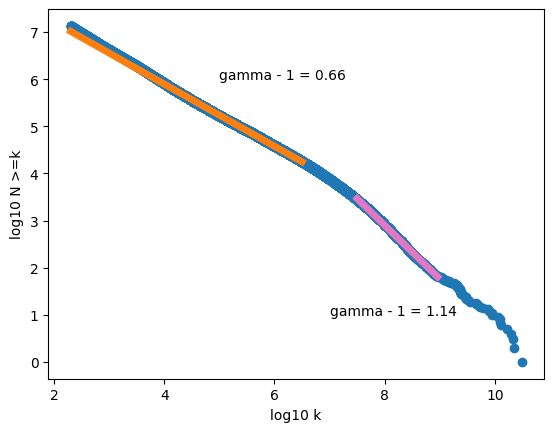

In [14]:
plt.xlabel('log10 k')
plt.ylabel('log10 N >=k')

# Plot CCDF again
plt.scatter(k_N_df['log10_k'], k_N_df['log10_Ngreaterk'])

# Plot linear fit for first range
plt.plot(x_range_1, y_range_1, color="tab:orange", linewidth=5)
plt.text(5, 6, f"gamma - 1 = {slope_1*-1:.2f}")

# Plot linear fit for second range
plt.plot(x_range_2, y_range_2, color="tab:pink", linewidth=5)
plt.text(7, 1, f"gamma - 1 = {slope_2*-1:.2f}")



plt.show()

In [15]:
del(k_N_df)

### Question 3
> 3. Size-rank plots:
Using the alternate data set providing the raw word frequencies, plot word
frequency as a function of rank in the manner of Zipf.
Hint: you will not be able to plot all points (there are close to 14 million) so
think about how to plot a subsample that still shows the full form.

In [16]:
zipped_file = 'google_vocab_rawwordfreqs.txt.gz'
column_names = ['k', 'N']
raw_words = pd.read_csv(zipped_file,
                     compression='gzip',
                     sep=' ',
                     names=column_names)
raw_words = raw_words.sample(1000000)  # downsample heavily to something plottable

In [17]:
raw_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 4317038 to 10844414
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   k       1000000 non-null  int64  
 1   N       0 non-null        float64
dtypes: float64(1), int64(1)
memory usage: 22.9 MB


In [18]:
raw_words['rank'] = raw_words['k'].rank(ascending=False, method='first')
raw_words.sort_values('rank', ascending=True).head()

,k,N,rank
1,95119665584,NaN,1.0
11,9036544694,NaN,2.0
15,6049971428,NaN,3.0
19,4485993232,NaN,4.0
35,2310930135,NaN,5.0


In [19]:
raw_words['log10_rank'] = np.log10(raw_words['rank'])
raw_words['log10_k'] = np.log10(raw_words['k'])

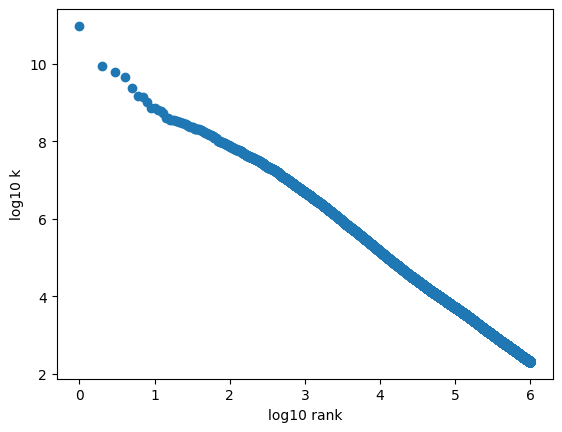

In [20]:
plt.xlabel('log10 rank')
plt.ylabel('log10 k')
plt.scatter(raw_words['log10_rank'], raw_words['log10_k'])

### Question 4
> 4. Using standard linear regression, measure α, Zipf’s exponent. Report the 95%
confidence interval for your estimate.
Again, you will find two regimes

In [21]:
regime_1 = {"min": 1.0, "max": 2.5}
regime_2 = {"min": 3.5, "max": 6.0}

In [22]:
scaling_range_1 = raw_words[(raw_words['log10_rank'] < regime_1["max"]) & (raw_words['log10_rank'] >= regime_1["min"])]
scaling_range_2 = raw_words[(raw_words['log10_rank'] < regime_2["max"]) & (raw_words['log10_rank'] >= regime_2["min"])]

X1 = sm.add_constant(scaling_range_1['log10_rank'])
line_1 = sm.OLS(scaling_range_1['log10_k'], X1).fit()
alpha_1 = line_1.params.log10_rank
intercept_1 = line_1.params.const
x_range_1 = scaling_range_1['log10_rank']
y_range_1 = scaling_range_1['log10_rank'] * alpha_1 + intercept_1
print(line_1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.997     
Dependent Variable: log10_k          AIC:                -1544.8382
Date:               2023-10-01 16:37 BIC:                -1537.3845
No. Observations:   307              Log-Likelihood:     774.42    
Df Model:           1                F-statistic:        9.150e+04 
Df Residuals:       305              Prob (F-statistic): 0.00      
R-squared:          0.997            Scale:              0.00037959
--------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          9.8550    0.0070  1402.0988  0.0000   9.8412   9.8688
log10_rank    -0.9935    0.0033  -302.4949  0.0000  -0.9999  -0.9870
-------------------------------------------------------------------
Omnibus:              134.930       Durbin-Watson:          1

In [23]:
X2 = sm.add_constant(scaling_range_2['log10_rank'])
line_2 = sm.OLS(scaling_range_2['log10_k'], X2).fit()
alpha_2 = line_2.params.log10_rank
intercept_2 = line_2.params.const
x_range_2 = scaling_range_2['log10_rank']
y_range_2 = scaling_range_2['log10_rank'] * alpha_2 + intercept_2
print(line_2.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     1.000        
Dependent Variable: log10_k          AIC:                -6502302.2258
Date:               2023-10-01 16:37 BIC:                -6502278.6011
No. Observations:   996837           Log-Likelihood:     3.2512e+06   
Df Model:           1                F-statistic:        3.889e+09    
Df Residuals:       996835           Prob (F-statistic): 0.00         
R-squared:          1.000            Scale:              8.6030e-05   
-----------------------------------------------------------------------
                Coef.   Std.Err.       t       P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const          10.7547    0.0001   85085.0369  0.0000  10.7544  10.7549
log10_rank     -1.4104    0.0000  -62361.4916  0.0000  -1.4105  -1.4104
----------------------------------------------------------------------
Omnibus:             

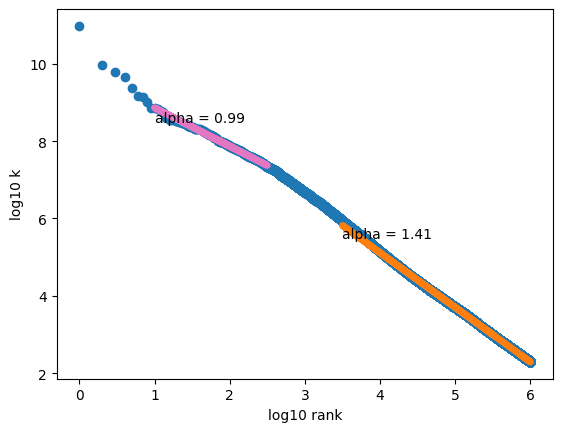

In [24]:
plt.xlabel('log10 rank')
plt.ylabel('log10 k')
plt.scatter(raw_words['log10_rank'], raw_words['log10_k'])


# Plot linear fit for first range
plt.plot(x_range_1, y_range_1, color="tab:pink", linewidth=5)
plt.text(1, 8.5, f"alpha = {alpha_1 * - 1:.2f}")

# Plot linear fit for second range
plt.plot(x_range_2, y_range_2, color="tab:orange", linewidth=5)
plt.text(3.5, 5.5, f"alpha = {alpha_2 * -1:.2f}")

plt.show()

### Question 5
> 5. For each scaling regime, write down how γ and α are related (per lectures) and
check how this expression works for your estimates here.

alpha = 1 / (gamma - 1)

In [39]:
print(alpha_1, 1/slope_2)
print(1/alpha_1, slope_2)

-0.9934615161761057 -0.8798686044407892
-1.0065815169661139 -1.1365333357195553


In [40]:
print(alpha_2, 1/slope_1)
print(1/alpha_2, slope_1)

-1.4104092221099405 -1.5170569577302837
-0.709014082100245 -0.6591710317166544


### Question 6
> 3 + 3) Baby name frequencies in the US:
Note: We will use this data set again in the next assignment.

#### Part A
> Plot the Complementary Cumulative Frequency Distributions and Size-rank
plots (Zipf’s law) for the following:
i. Baby girl names in 1952.
ii. Baby boy names in 1952.
iii. Baby girl names in 2002.
iv. Baby boy names in 2002.
Note that you will have counts that will make the Zipf distribution easy to
plot straight away.
From these counts, you will have to create the distributions Nk and N≥k.

In [27]:
# del names

In [28]:
def csv_to_df(fname):
    columns = ['name', 'gender', 'count']
    df = pd.read_csv(fname, sep=',', names=columns)
    df['year'] = fname[-8:-4]
    return df
    
fpaths = ['data/names-girls1952.txt',
          'data/names-boys1952.txt',
          'data/names-girls2002.txt',
          'data/names-boys2002.txt']
          
for f in fpaths:
    try:
        print(f)
        names = pd.concat((names, csv_to_df(f)))
    except NameError as e:
        names = csv_to_df(f)


data/names-girls1952.txt
data/names-boys1952.txt
data/names-girls2002.txt
data/names-boys2002.txt


In [29]:
names.head()

,name,gender,count,year
0,Linda,F,67082,1952
1,Mary,F,65634,1952
2,Patricia,F,53098,1952
3,Deborah,F,49814,1952
4,Susan,F,41350,1952


In [30]:
 names['rank'] = names.groupby(['gender', 'year'], as_index=False)['count'].rank(ascending=False, method='first')

In [31]:
names['log10_rank'] = np.log10(names['rank'])
names['log10_count'] = np.log10(names['count'])

In [32]:
names.tail(100)

,name,gender,count,year,rank,log10_rank,log10_count
12382,Vail,M,5,2002,12383.0,4.092826,0.69897
12383,Valeriano,M,5,2002,12384.0,4.092861,0.69897
12384,Valerio,M,5,2002,12385.0,4.092896,0.69897
12385,Vallen,M,5,2002,12386.0,4.092931,0.69897
12386,Vandan,M,5,2002,12387.0,4.092966,0.69897
...,...,...,...,...,...,...,...
12477,Zimri,M,5,2002,12478.0,4.096145,0.69897
12478,Zoran,M,5,2002,12479.0,4.096180,0.69897
12479,Zyen,M,5,2002,12480.0,4.096215,0.69897
12480,Zylan,M,5,2002,12481.0,4.096249,0.69897


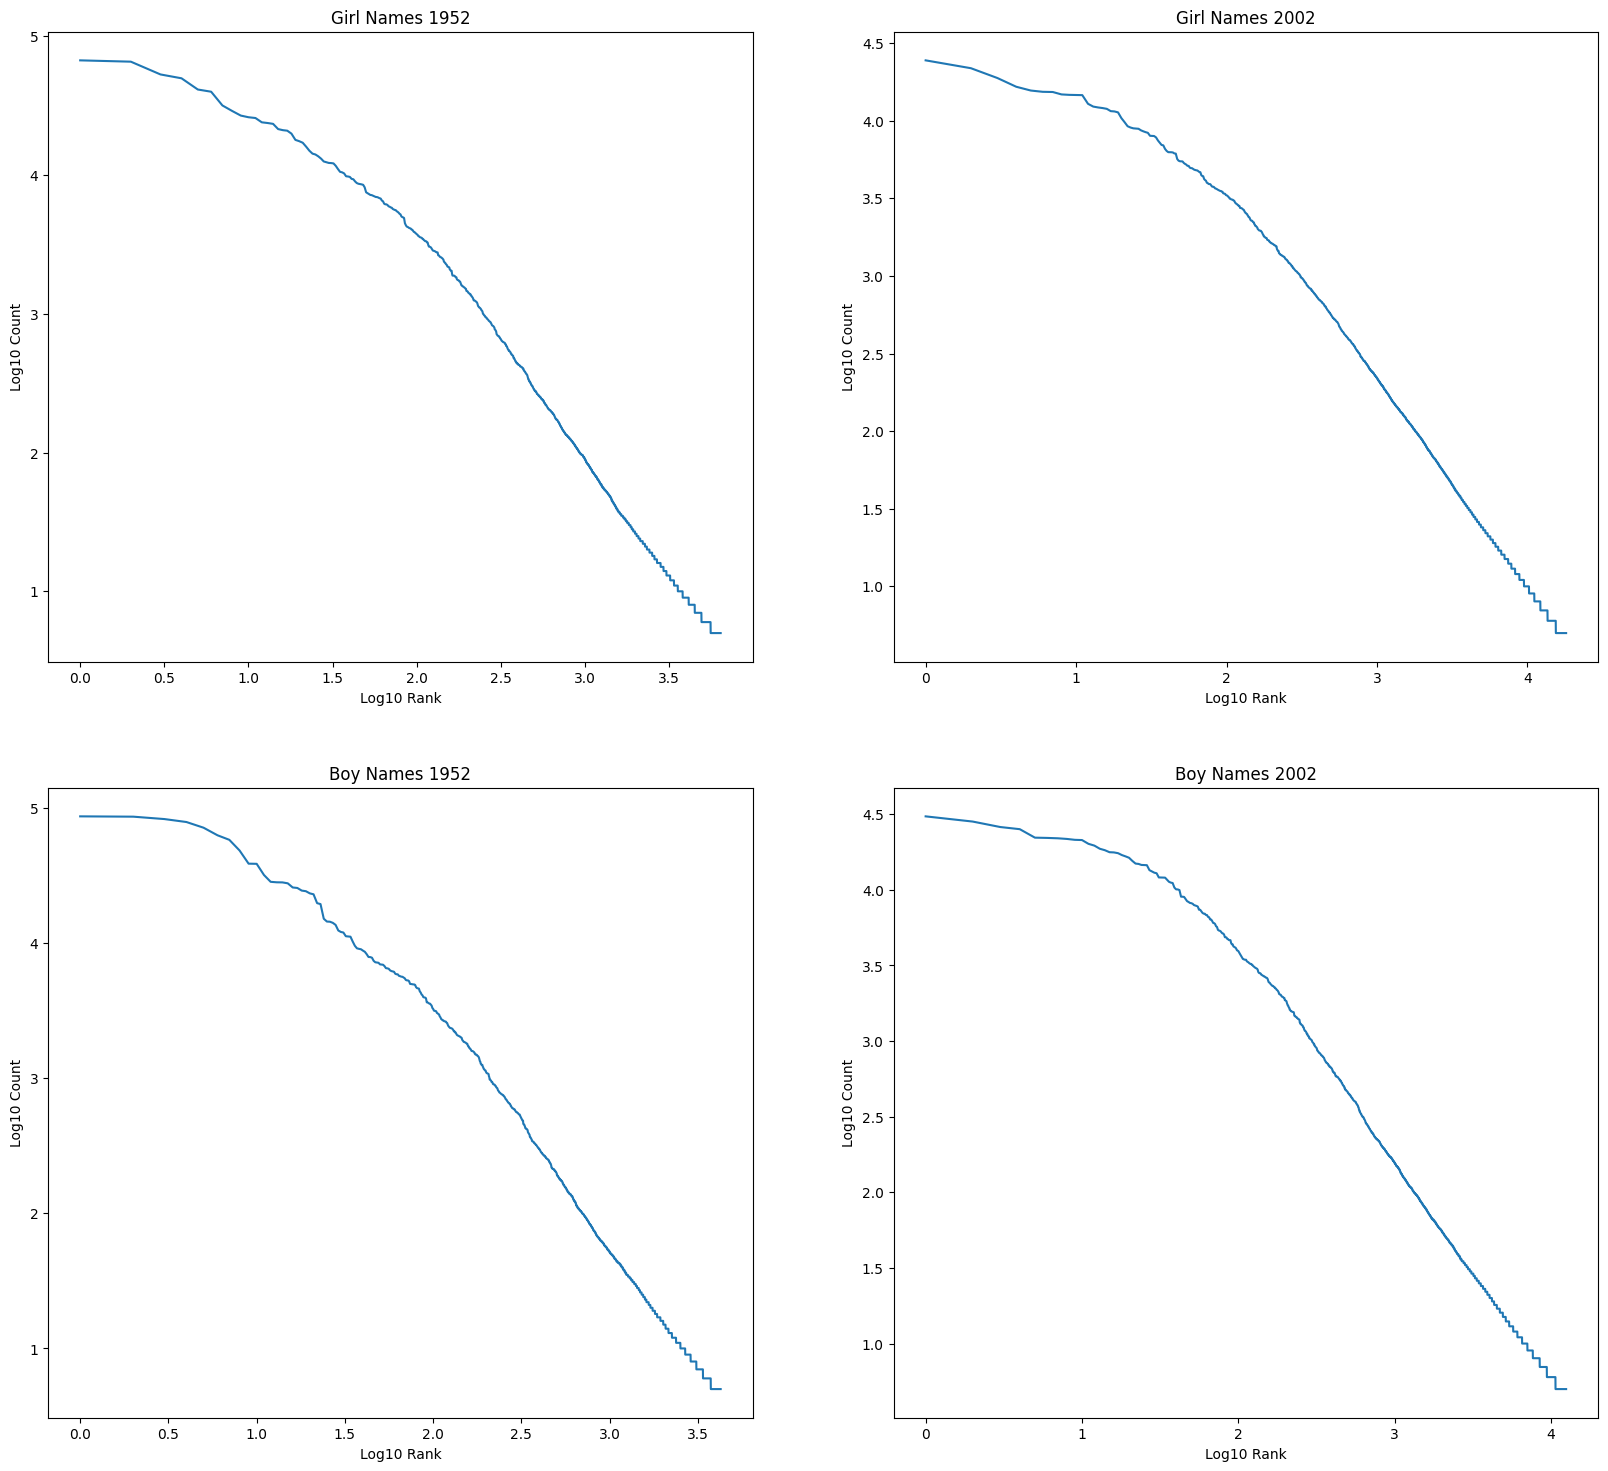

In [33]:
genders = ['F', 'M']
years = ['1952', '2002']


fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, year in enumerate(years):
        # get data
        x = names[(names['year'] == year) & (names['gender'] == gender)]['log10_rank']
        y = names[(names['year'] == year) & (names['gender'] == gender)]['log10_count']

        # set axis titles
        ax[i,j].set_xlabel('Log10 Rank')
        ax[i,j].set_ylabel('Log10 Count')
        readable_gender = "Girl" if gender == "F" else "Boy"
        ax[i,j].title.set_text(readable_gender + " Names " + year)

        # plot
        ax[i,j].plot(x, y)

In [34]:
frequencies = names.groupby(['gender', 'year', 'count'], as_index=False)['name'].count()

In [35]:
frequencies['log10_k'] = np.log10(frequencies['count'])
frequencies = frequencies.sort_values(by='count', ascending=False)
frequencies['cumul_name_count'] = frequencies.groupby(['gender', 'year'])['name'].cumsum()
frequencies['log10_Ngreaterk'] = np.log10(frequencies['cumul_name_count'])
frequencies.head()

,gender,year,count,name,log10_k,cumul_name_count,log10_Ngreaterk
2197,M,1952,87063,1,4.939834,1,0.000000
2196,M,1952,86604,1,4.937538,2,0.301030
2195,M,1952,83138,1,4.919800,3,0.477121
2194,M,1952,79049,1,4.897896,4,0.602060
2193,M,1952,71750,1,4.855822,5,0.698970


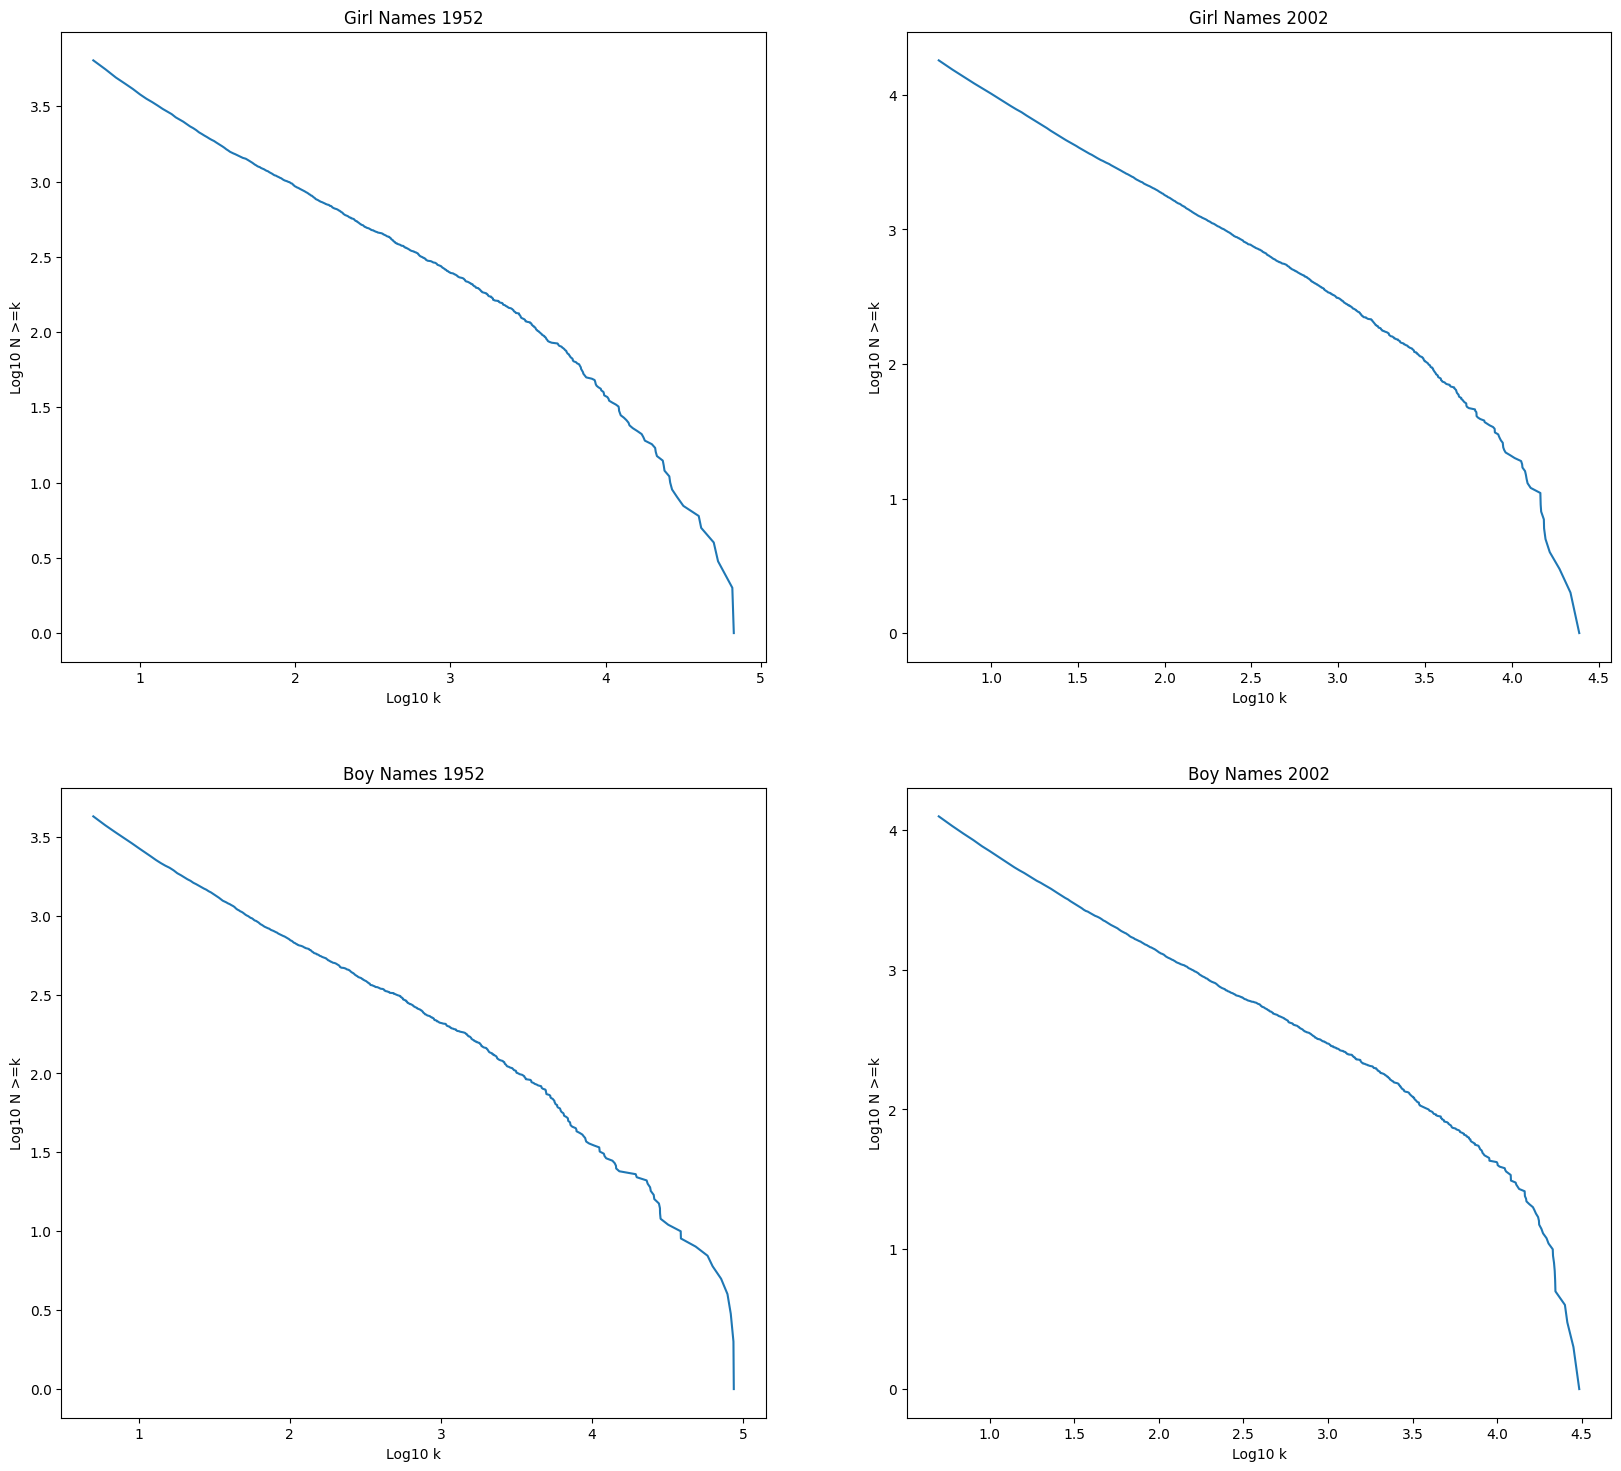

In [36]:
genders = ['F', 'M']
years = ['1952', '2002']


fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    for j, year in enumerate(years):
        # get data
        x = frequencies[(frequencies['year'] == year) & (frequencies['gender'] == gender)]['log10_k']
        y = frequencies[(frequencies['year'] == year) & (frequencies['gender'] == gender)]['log10_Ngreaterk']

        # set axis titles
        ax[i,j].set_xlabel('Log10 k')
        ax[i,j].set_ylabel('Log10 N >=k')
        readable_gender = "Girl" if gender == "F" else "Boy"
        ax[i,j].title.set_text(readable_gender + " Names " + year)

        # plot
        ax[i,j].plot(x, y)

#### Part B
> As you did for the Google data set, fit regression lines and report values of γ
and the Zipf exponent α.
BUT: Only fit lines if fitting lines make sense!
You may only have one region of scaling or zero.

### ZIPF

F
	1952
		(2.25, 3.5)
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.999      
Dependent Variable: log10_count      AIC:                -17068.4569
Date:               2023-10-01 17:09 BIC:                -17056.4542
No. Observations:   2985             Log-Likelihood:     8536.2     
Df Model:           1                F-statistic:        4.151e+06  
Df Residuals:       2983             Prob (F-statistic): 0.00       
R-squared:          0.999            Scale:              0.00019227 
---------------------------------------------------------------------
               Coef.   Std.Err.      t       P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const          7.1136    0.0027   2666.3470  0.0000   7.1084   7.1189
log10_rank    -1.7231    0.0008  -2037.3441  0.0000  -1.7248  -1.7215
--------------------------------------------------------------------
Omnibus:               74.

/Users/annepope/.venv/assignment1/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/annepope/.venv/assignment1/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/annepope/.venv/assignment1/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


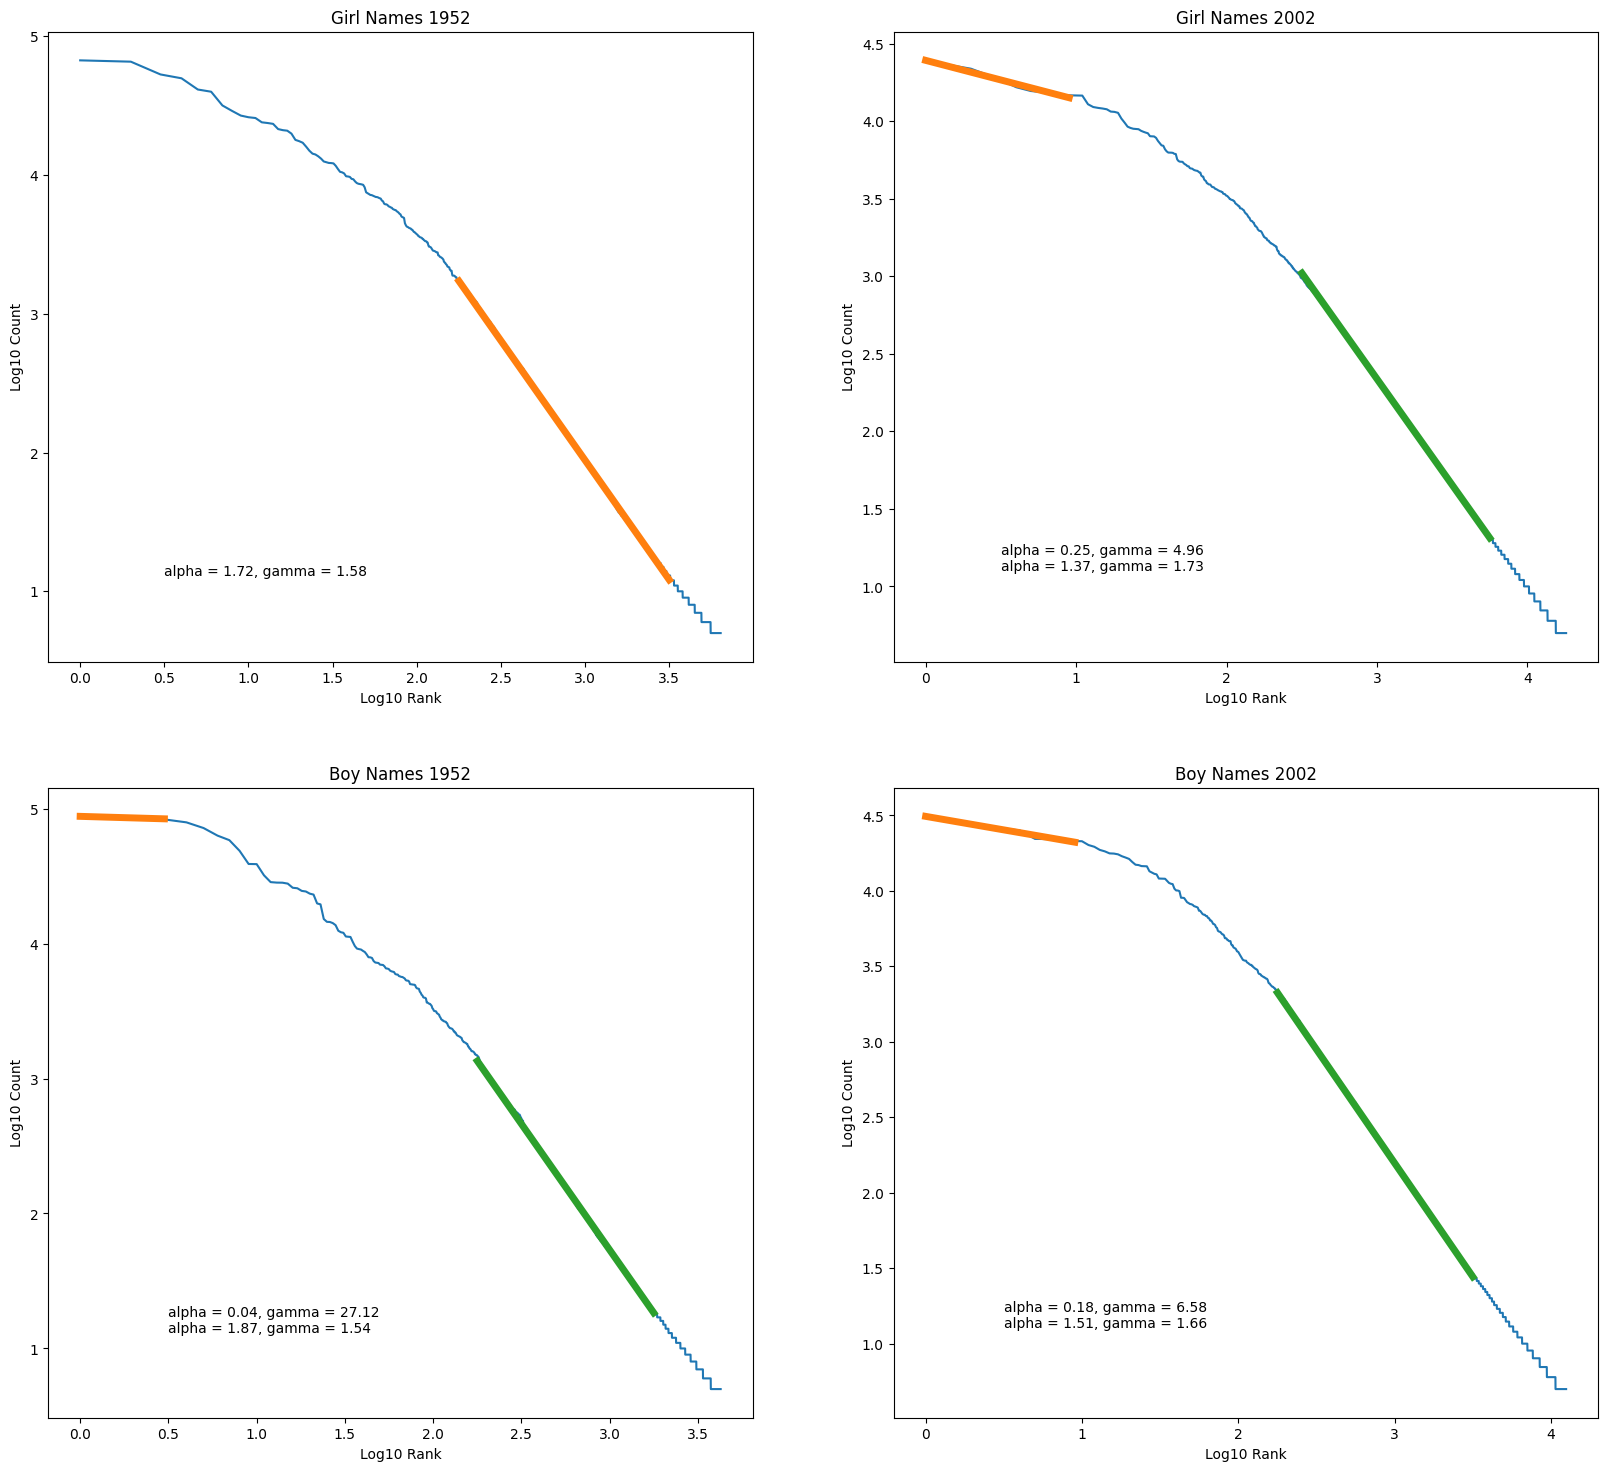

In [41]:
genders = ['F', 'M']
years = ['1952', '2002']

scaling_regimes = {
    "F": {
        "1952": [
            (2.25, 3.5)
        ],
        "2002": [
            (0.0, 1.0),
            (2.5, 3.75)
        ]
    },
    "M": {
        "1952": [
            (0.0, 0.5),
            (2.25, 3.25)
        ],
        "2002": [
            (0.0, 1.0),
            (2.25, 3.5)
        ]
    }
}

fig, ax = plt.subplots(len(genders), len(years), figsize=(20,18))

for i, gender in enumerate(genders):
    print(gender)
    for j, year in enumerate(years):
        print("\t" + year)
        # get data
        curr_data = names[(names['year'] == year) & (names['gender'] == gender)]
        x = curr_data['log10_rank']
        y = curr_data['log10_count']
        
        # set axis titles
        ax[i,j].set_xlabel('Log10 Rank')
        ax[i,j].set_ylabel('Log10 Count')
        readable_gender = "Girl" if gender == "F" else "Boy"
        ax[i,j].title.set_text(readable_gender + " Names " + year)

        # plot
        ax[i,j].plot(x, y)

        # get fit line(s)
        text = ""
        for v, r in enumerate(scaling_regimes[gender][year]): 
            print("\t\t" + str(r))
            scaling_range = curr_data[(curr_data['log10_rank'] < r[1]) & (curr_data['log10_rank'] >= r[0])]
            X = sm.add_constant(scaling_range['log10_rank'])
            line = sm.OLS(scaling_range['log10_count'], X).fit()
            alpha = line.params.log10_rank
            text += f"alpha = {alpha * -1:.2f}, gamma = {(-1 / alpha + 1):.2f}" + "\n"
            intercept = line.params.const
            x_line = scaling_range['log10_rank']
            y_line = scaling_range['log10_rank'] * alpha + intercept
            print(line.summary2())
            ax[i,j].plot(x_line, y_line, linewidth=5)
        ax[i,j].text(0.5, 1, text)
            